# PRP Benchmark Results

In [1]:
import os, sys; os.chdir('..'); sys.path[0]=os.getcwd() # project root, run once

In [2]:
import matplotlib.pyplot
import pandas as pd
import json
from glob import glob
from ior.parse_output import *

## CephFS Single Node sweep
- Storage: CephFS ReadWriteMany (Spinning drive, NVMe meta), 100GiB (UCSD)
- Nodes: [Suncave (UCSD)], ea 8cpu, 8GiB ram
- Date: 2021/04/27

In [3]:
dfB = parse_ior('PRP/out/IOR-blockSize-initial-sweep.json')

0 days 00:41:48


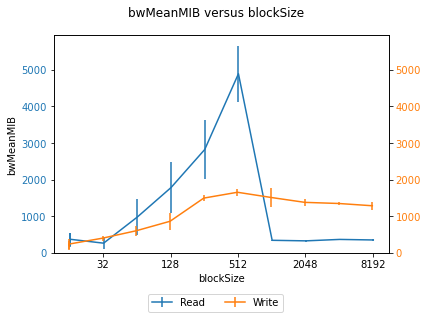

In [5]:
f,a=make_plot(dfB, 'blockSize', 'bwMeanMIB', 'bwStdMIB')
f,a=rescale_axis(f,a,'x',factor=1/MEBI,logbase=2)
f,a=rescale_axis(f,a,'y',lim=(0,),sharey=True)

In [6]:
dfT = parse_ior('PRP/out/IOR-transferSize-initial-sweep.json')

0 days 00:07:07


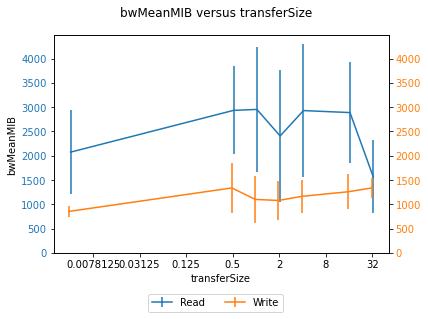

In [8]:
f,a=make_plot(dfT,'transferSize','bwMeanMIB','bwStdMIB',xsep=0.05)
f,a=rescale_axis(f,a,'x',1/MEBI,logbase=2)
f,a=rescale_axis(f,a,'y',lim=(0,),sharey=True)

In [9]:
dfTt = parse_ior('PRP/out/large_IOR-transferSize-initial-sweep.json')

0 days 00:12:09


Text(0.5, 0.98, 'TransferSize from 4k to 64m; 512m file, 8 procs')

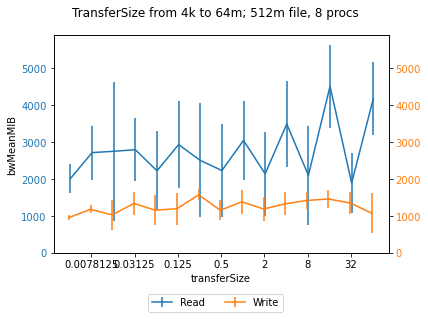

In [10]:
f,a=make_plot(dfTt,'transferSize','bwMeanMIB','bwStdMIB',xsep=0.05)
f,a=rescale_axis(f,a,'x',1/MEBI,logbase=2)
f,a=rescale_axis(f,a,'y',lim=(0,),sharey=True)
f.suptitle('TransferSize from 4k to 64m; 512m file, 8 procs')

I wonder... block size peaks at 512m... what happens if we accomplish larger file size by keeping block size 512 with more segments?

In [11]:
dfS = parse_ior('PRP/out/IOR-numSegments-512m-block.json')

0 days 00:08:58


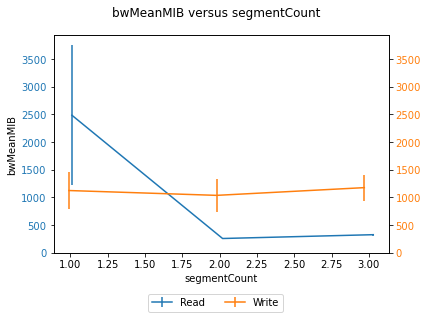

In [12]:
f,a=make_plot(dfS, 'segmentCount', 'bwMeanMIB', 'bwStdMIB')
f,a=rescale_axis(f,a,'y',lim=(0,),sharey=True)